# Homework 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import utils as utils
from fractions import Fraction
from conjugate import ConjugateGradient

from func import Func
from IPython.display import display, HTML

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

---
## Exercise 10.5

<img src="figures/homework-10/exercise-10.5.png" width="600" />


We want the directions $\mathbf{d}^{(k)}$ and $\mathbf{d}^{(k+1)}$ to be $Q$-conjugate.

So $\mathbf{d}^{(k)T}Q\mathbf{d}^{(k+1)} = 0$.

To derive a formula for $\gamma_k$, we simply all terms with  $\mathbf{d}^{(k)T}Q$.

\begin{align}
\mathbf{d}^{(k+1)} &= \gamma_k \mathbf{g}^{(k+1)} + \mathbf{d}^{(k)} \\
\mathbf{d}^{(k)T}Q\mathbf{d}^{(k+1)} &= \gamma_k \mathbf{d}^{(k)T}Q \mathbf{g}^{(k+1)} + \mathbf{d}^{(k)T}Q\mathbf{d}^{(k)} \\
\end{align}


Since we want the directions $\mathbf{d}^{(k)}$ and $\mathbf{d}^{(k+1)}$ to be $Q$-conjugate, the left-hand side of the equation is zero:

\begin{align}
0 &= \gamma_k \mathbf{d}^{(k)T}Q \mathbf{g}^{(k+1)} + \mathbf{d}^{(k)T}Q\mathbf{d}^{(k)} \\
- \mathbf{d}^{(k)T}Q\mathbf{d}^{(k)} &= \gamma_k \mathbf{d}^{(k)T}Q \mathbf{g}^{(k+1)} \\
- \frac{\mathbf{d}^{(k)T}Q\mathbf{d}^{(k)}}{\mathbf{d}^{(k)T}Q \mathbf{g}^{(k+1)}} &= \gamma_k \\
\end{align}

Now we have formula for $\gamma_k$.

---
## Exercise 10.10

<img src="figures/homework-10/exercise-10.10.png" width="600" />


In [2]:
x1, x2 = sy.symbols('x1, x2')
f_ex1010 = Func(Fraction(5,2) * x1**2 + Fraction(1,2)*x2**2 + 2*x1*x2 - 3*x1 - x2, (x1, x2))
f_ex1010

⎡    2                      2     ⎤
⎢5⋅x₁                     x₂      ⎥
⎢───── + 2⋅x₁⋅x₂ - 3⋅x₁ + ─── - x₂⎥
⎣  2                       2      ⎦

(<Figure size 864x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fedd11d4588>)

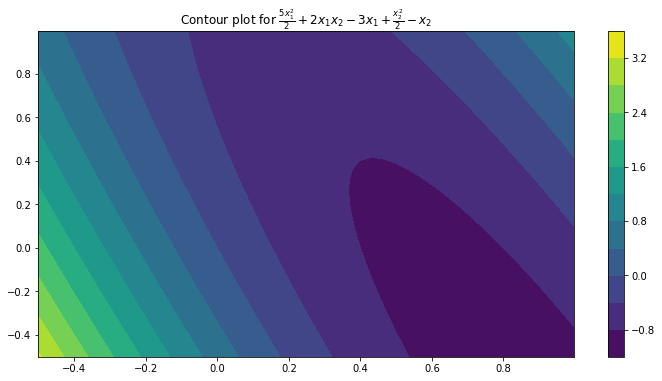

In [3]:
f_ex1010.plot_contour(x_limit=(-0.5, 1.0))

---
### Exercise 10.10 a)

<img src="figures/homework-10/exercise-10.10-a.png" width="600" />


We simply read off the entries for $Q$ in the function coefficients:

$$
Q=\begin{bmatrix}
x_1^2 & x_1 x_2 \\
x_2 x_1 & x_2^2 \\
\end{bmatrix},
\mathbf{b}=
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix},
$$

Since we are dividing the quantity $\mathbf{x}^TQ \mathbf{x}$ with 2, we have to multiply the coefficients in front of $x_1^2$ and $x_2^2$ by 2.

The function $f$ can be expressed as:
$$
f\left(\mathbf{x} \right) =
\frac{1}{2} \mathbf{x}^T 
\begin{bmatrix}
5 & 2 \\
2 & 1
\end{bmatrix}
\mathbf{x}
-
\mathbf{x}^T
\begin{bmatrix}
3 \\
1
\end{bmatrix}
$$

In [6]:
Q, b = f_ex1010.as_quadratic_form_for_gradient_descent()
Q, b

⎛⎡5  2⎤  ⎡3⎤⎞
⎜⎢    ⎥, ⎢ ⎥⎟
⎝⎣2  1⎦  ⎣1⎦⎠

In [7]:
# Let us check our result
x = sy.Matrix([[x1],
               [x2]])
Q = sy.Matrix([[5, 2],
               [2, 1]])
b = sy.Matrix([[3],
               [1]])
sy.expand(Fraction(1, 2) * x.T * Q * x - x.T*b)

⎡    2                      2     ⎤
⎢5⋅x₁                     x₂      ⎥
⎢───── + 2⋅x₁⋅x₂ - 3⋅x₁ + ─── - x₂⎥
⎣  2                       2      ⎦

---
### Exercise 10.10 b)

<img src="figures/homework-10/exercise-10.10-b.png" width="600" />


The steps of the algorithm is as follows:

<img src="figures/lecture-10/conjugate-gradient-algorithm-steps.png" width="600" />



In [8]:
Q = sy.Matrix([[5, 2],
               [2, 1]])

In [9]:
cg = ConjugateGradient(f_ex1010, Q)

In [10]:
x_star = cg.find_minimum((0, 0))

Stopping since g(k) = [ 0.0000,  0.0000]


$k$,$d^{(k)}$,$\alpha_k$,$x^{(k+1)}$,$g^{(k+1)}$,$\beta_k$
$0$,\begin{bmatrix}3.00000 \\ 1.00000 \\ \end{bmatrix},$0.172414$,\begin{bmatrix}0.51724 \\ 0.17241 \\ \end{bmatrix},\begin{bmatrix}-0.06897 \\ 0.20690 \\ \end{bmatrix},$0.004756$
$1$,\begin{bmatrix}0.08323 \\ -0.20214 \\ \end{bmatrix},$5.800000$,\begin{bmatrix}1.00000 \\ -1.00000 \\ \end{bmatrix},\begin{bmatrix}0.00000 \\ 0.00000 \\ \end{bmatrix},$0.000000$


In [11]:
x_star

⎡1 ⎤
⎢  ⎥
⎣-1⎦

---
### Exercise 10.10 c)

<img src="figures/homework-10/exercise-10.10-c.png" width="600" />


If we want to find the minimiser of $f$ analytically, we can use Corollary 6.1 (p 86). It says that we can find the a minimiser $\mathbf{x}^{*}$ by solving the following equation:
$$
\nabla f(\mathbf{x}^{*}) = \mathbf{0}
$$


We know that the gradient of the quadratic function is $\nabla f(\mathbf{x}) = Q\mathbf{x} - \mathbf{b}$. The FONC gives us two equations with two unknowns:

In [10]:
eq = Q * f_ex1010.func_args() - b
eq

⎡5⋅x₁ + 2⋅x₂ - 3⎤
⎢               ⎥
⎣ 2⋅x₁ + x₂ - 1 ⎦

Solving the system of equations, we get:

In [11]:
sy.nonlinsolve(eq, list(f_ex1010.func_args()))

Thus, $\mathbf{x}^{*} = [1, -1]^T$

We could also rewritten the FONC to get following formula:
\begin{align}
\nabla f(\mathbf{x}^{*}) &= \mathbf{0} \\
 Q\mathbf{x}^{*} - \mathbf{b} &= \mathbf{0} \\
 Q\mathbf{x}^{*} &= \mathbf{b} \\
 Q^{-1}Q\mathbf{x}^{*} &= Q^{-1}\mathbf{b} \\
 \mathbf{x}^{*} &= Q^{-1}\mathbf{b} \\
\end{align}

In [12]:
Q.inv() * b

⎡1 ⎤
⎢  ⎥
⎣-1⎦